<a href="https://colab.research.google.com/github/asokraju/ml-grinding/blob/master/Deep_AI/Course-1/Course_1_week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion Dataset

In [ ]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import models, layers, callbacks
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

fashion = keras.datasets.fashion_mnist


2.2.0


#Callbacks

In [ ]:
class onCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('accuracy')>0.9):
            print("\nAchieved 90% accuracy!")
            self.model.stop_training = True

callback = onCallback()

(train_img, train_lab), (test_img, test_lab) =  fashion.load_data()
train_img, test_img = train_img/255.0, test_img/255.0
model = keras.models.Sequential([
                                 Flatten(),
                                 Dense(units = 512, activation='relu'),
                                 Dense(units = 10, activation='softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x = train_img, y= train_lab, epochs = 20, callbacks = [callback])

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4725 - accuracy: 0.8316
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3584 - accuracy: 0.8684
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3229 - accuracy: 0.8818
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2986 - accuracy: 0.8891
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2816 - accuracy: 0.8957
Epoch 6/20
1863/1875 [============================>.] - ETA: 0s - loss: 0.2668 - accuracy: 0.9001
Achieved 90% accuracy!
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2673 - accuracy: 0.9000


In [ ]:
 model.evaluate(test_img, test_lab)

313/313 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8803


[0.3375157415866852, 0.880299985408783]

#Conv NN's

In [ ]:
(train_img, train_lab), (test_img, test_lab) =  fashion.load_data()
train_img, test_img = train_img.reshape(60000, 28,28,1), test_img.reshape(10000,28,28,1)
train_img, test_img = train_img/255.0, test_img/255.0

In [ ]:
class onCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('accuracy')>0.99):
            print("\nAchieved 99% accuracy!")
            self.model.stop_training = True

callback = onCallback()

model = models.Sequential([
                           Conv2D(filters= 64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
                           MaxPooling2D(strides=(2,2)),
                           Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                           MaxPooling2D(strides=(2,2)),
                           Flatten(),
                           Dense(units = 128, activation='relu'),
                           Dense(units = 10, activation='softmax')
])
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics = ['accuracy'])
model.summary()

model.fit(x = train_img, y = train_lab, epochs=10, callbacks=[callback])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
model.evaluate(test_img, test_lab)

313/313 [==============================] - 1s 2ms/step - loss: 0.2998 - accuracy: 0.9137


[0.29976505041122437, 0.9136999845504761]

In [ ]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
model.layers

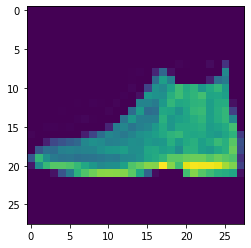

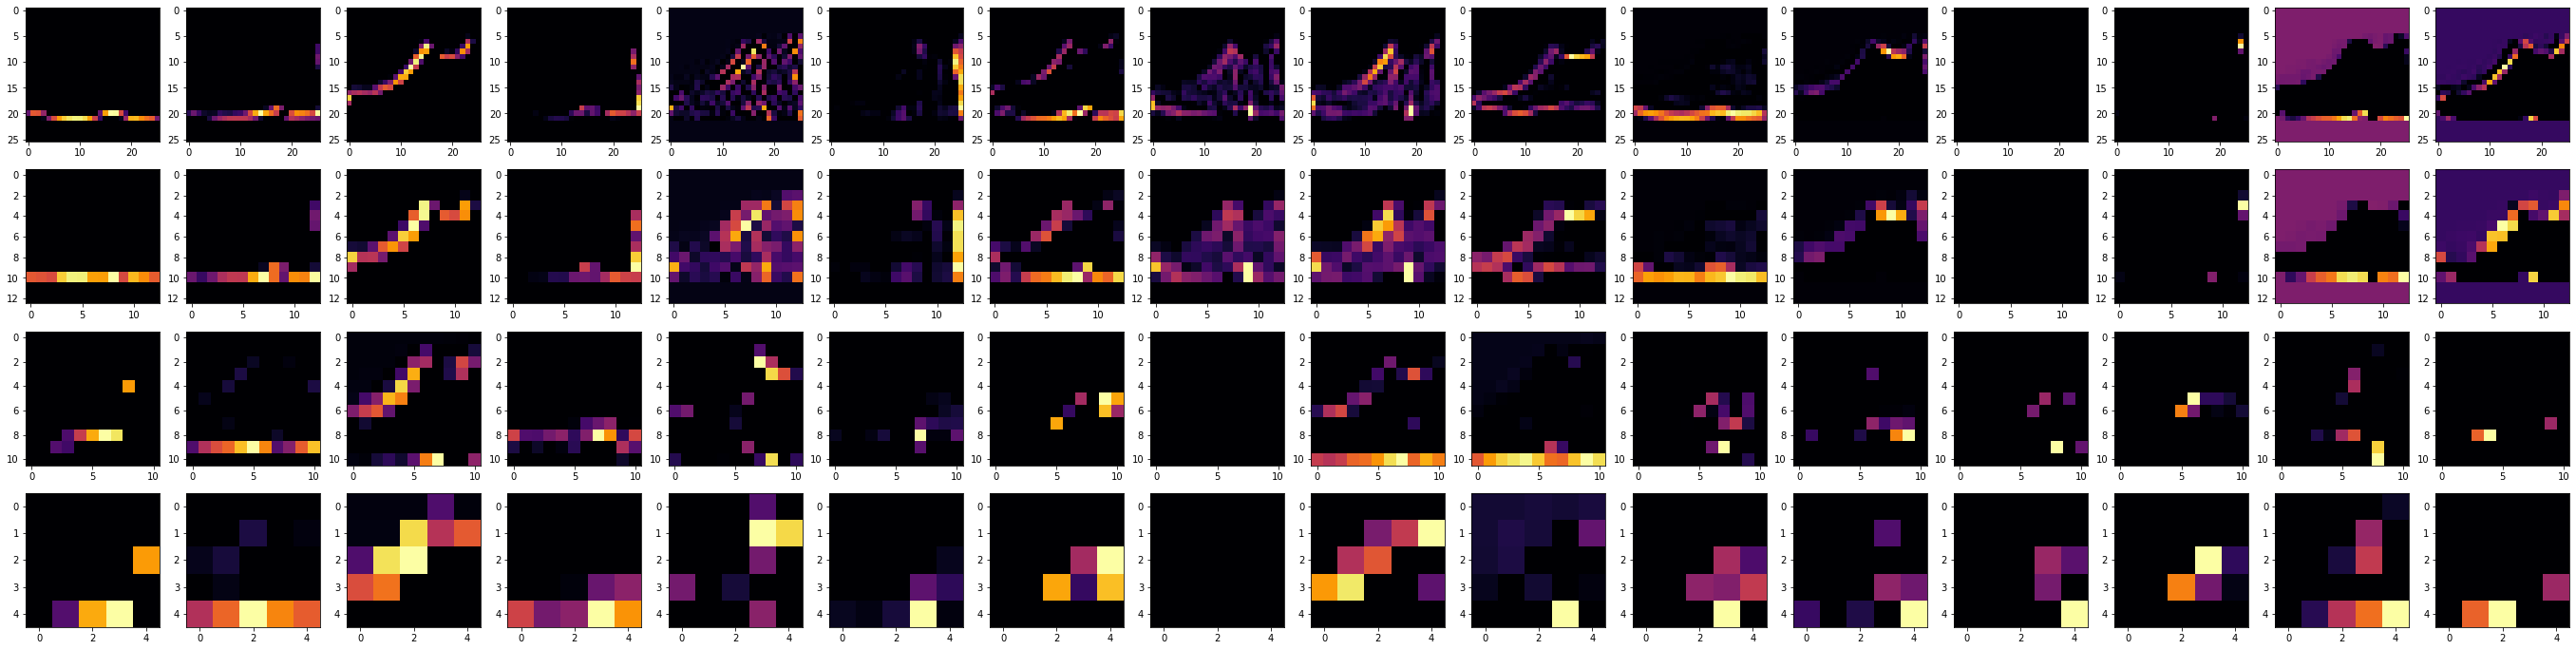

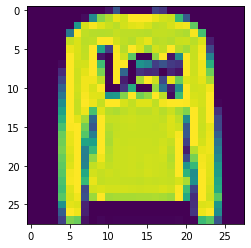

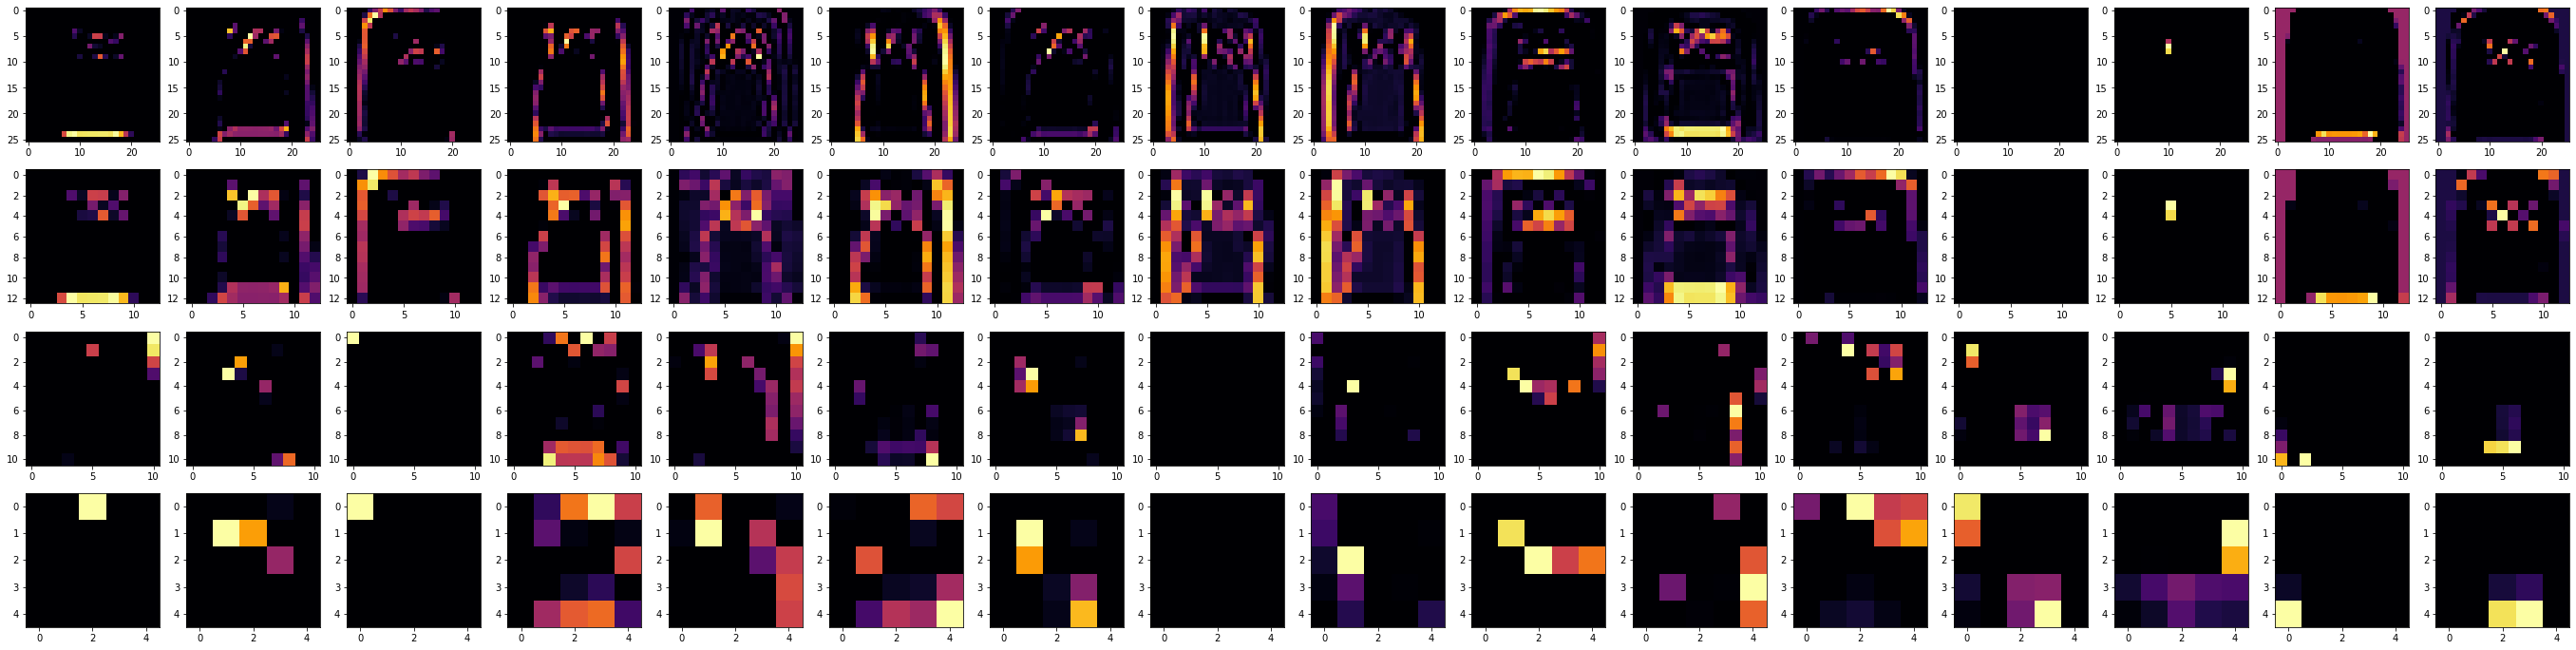

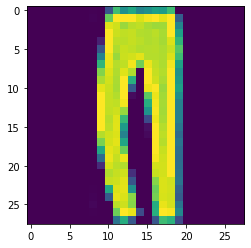

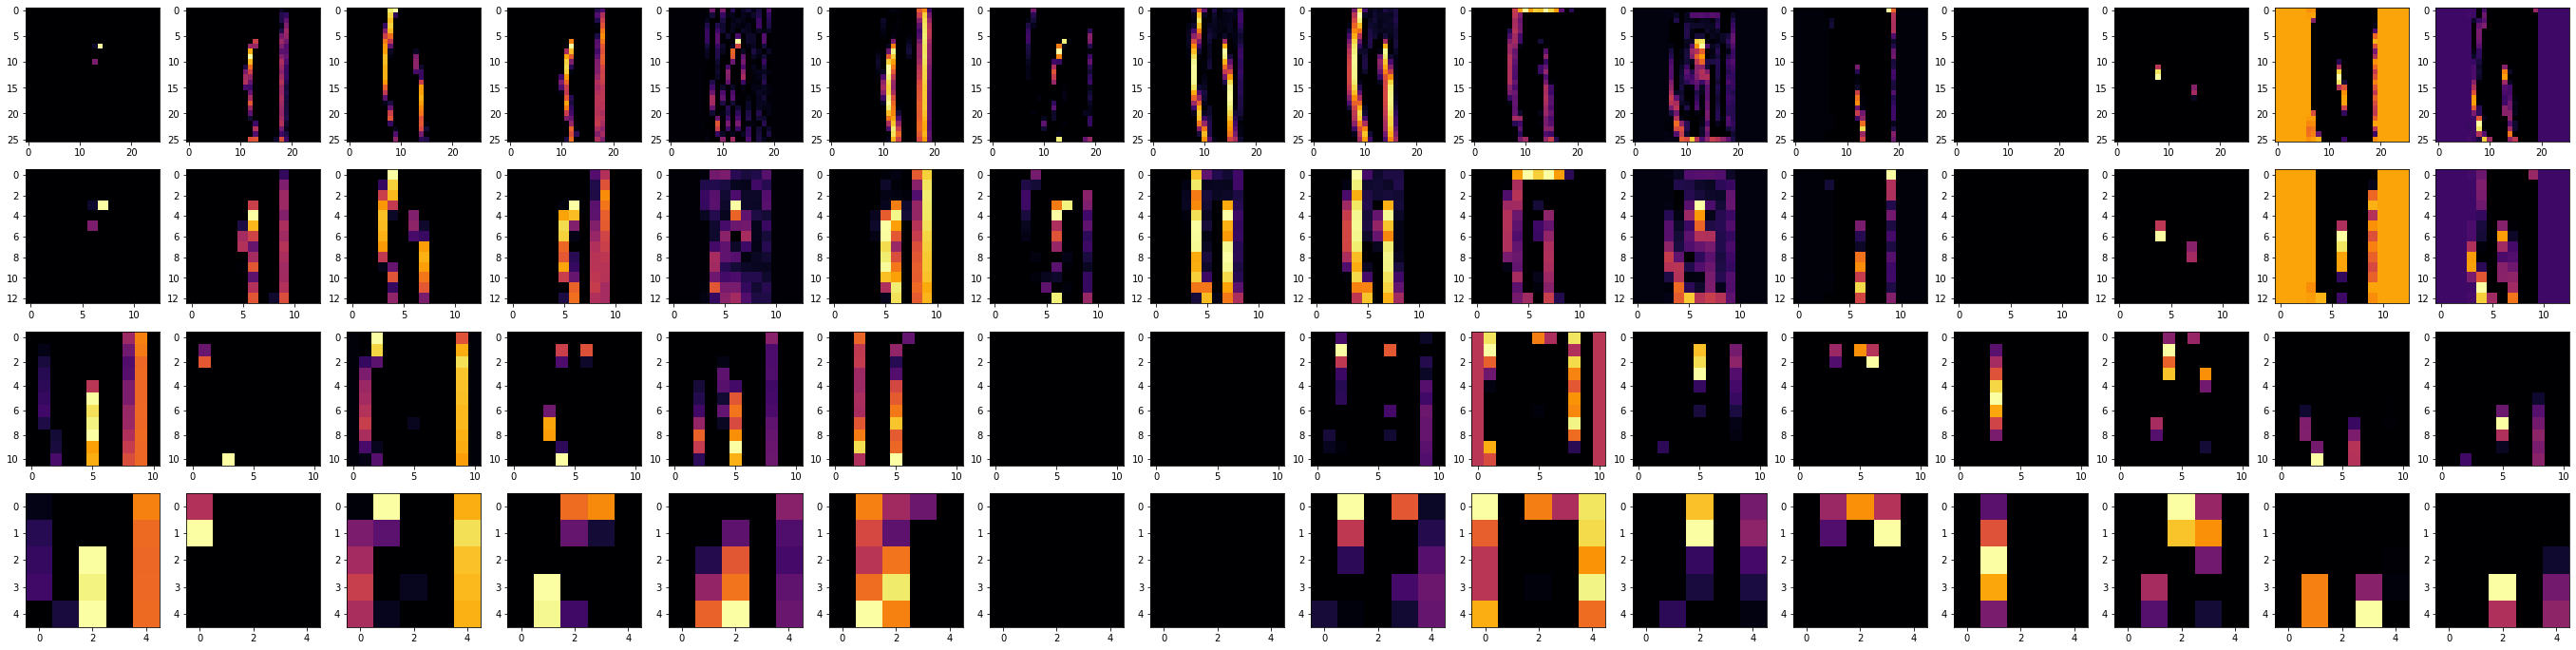

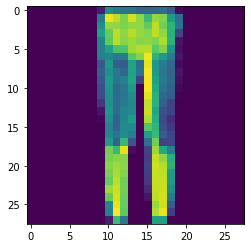

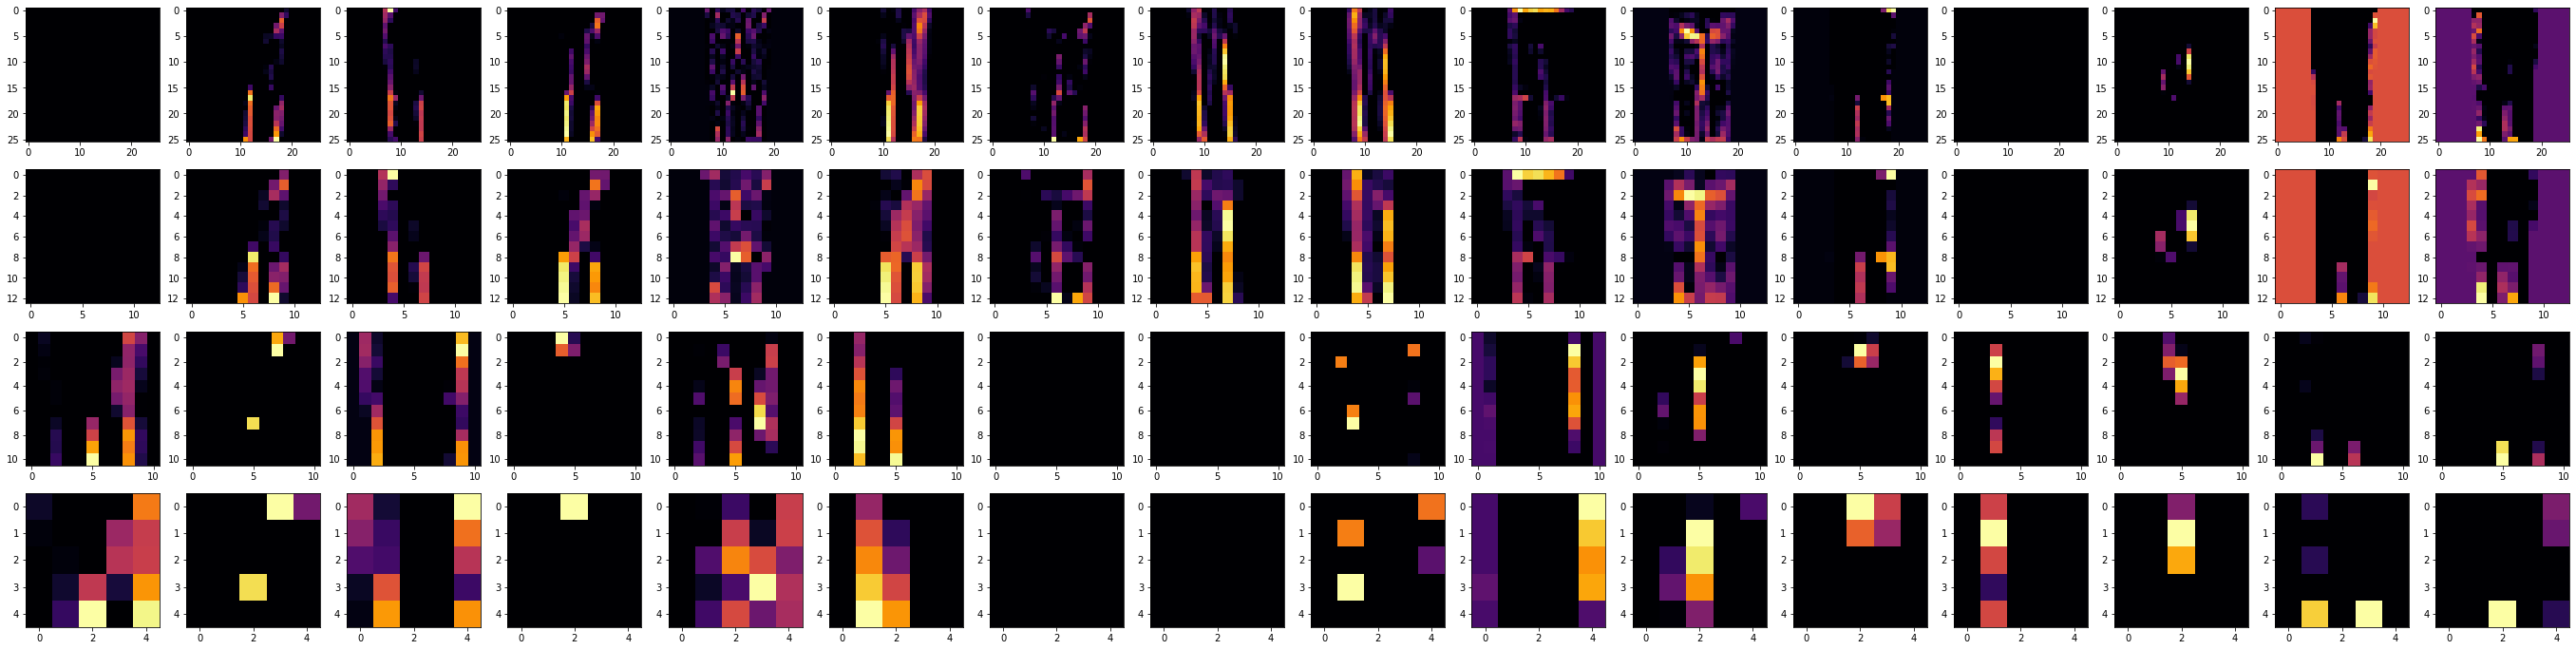

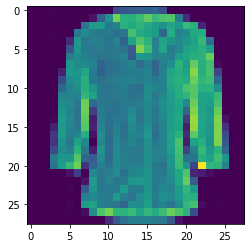

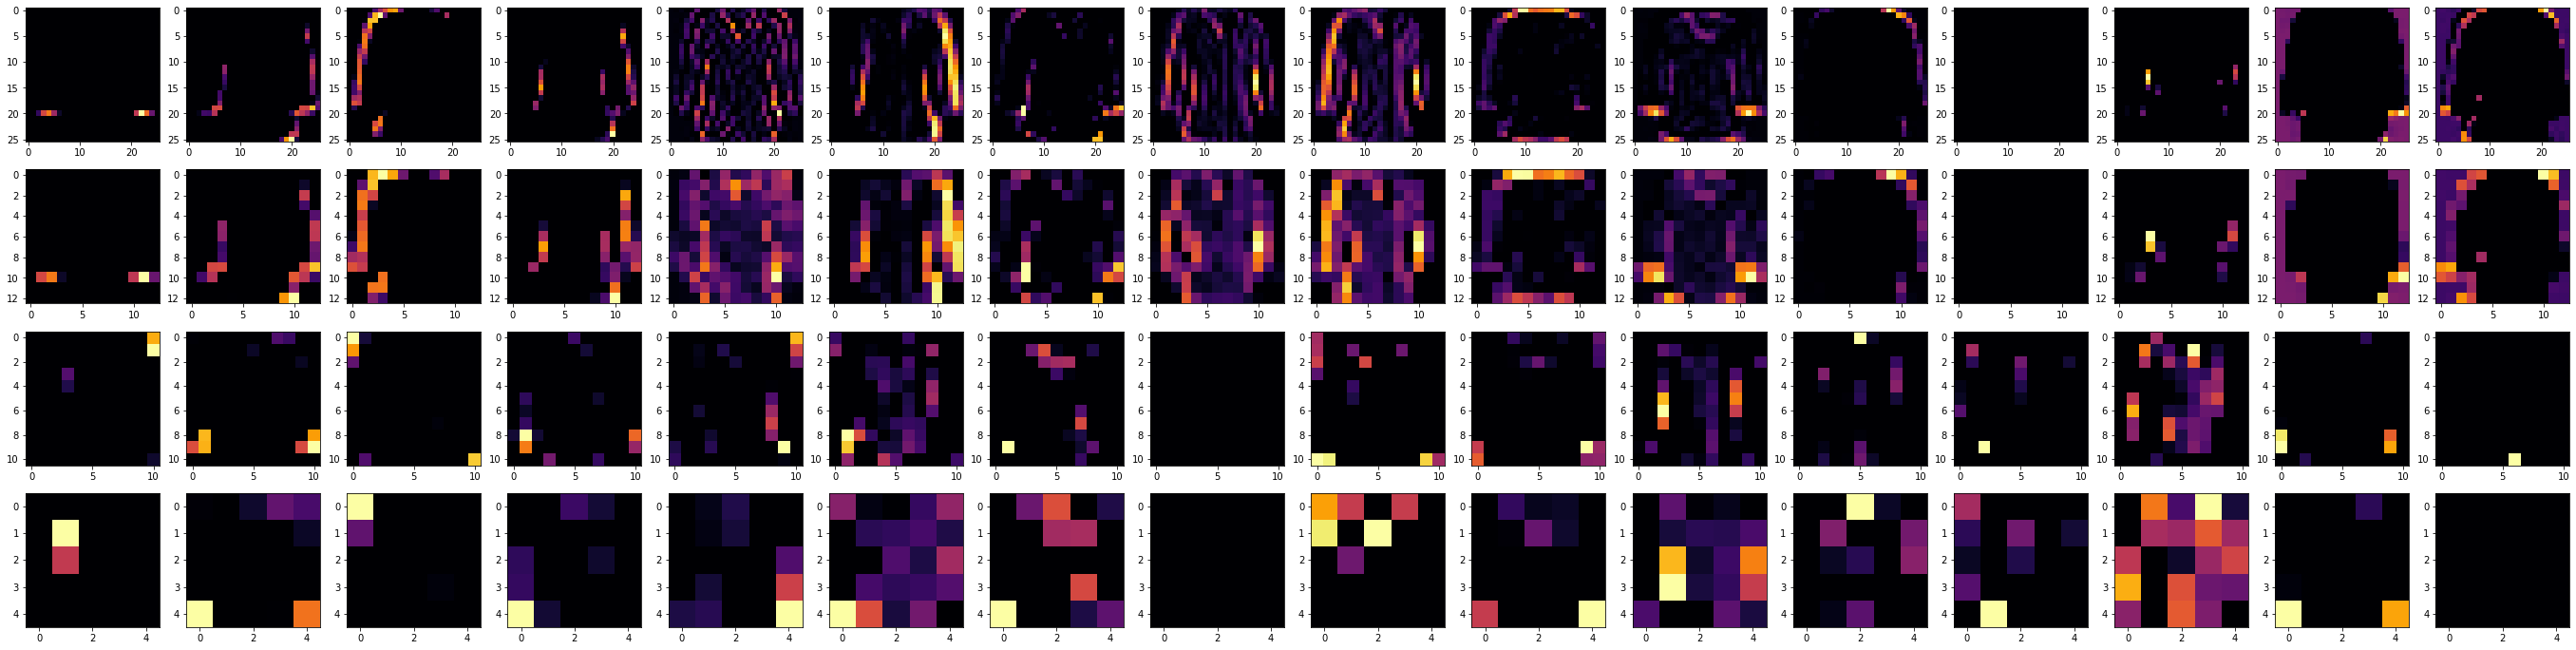

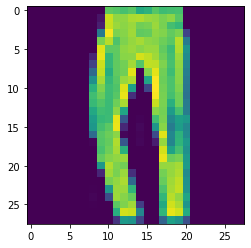

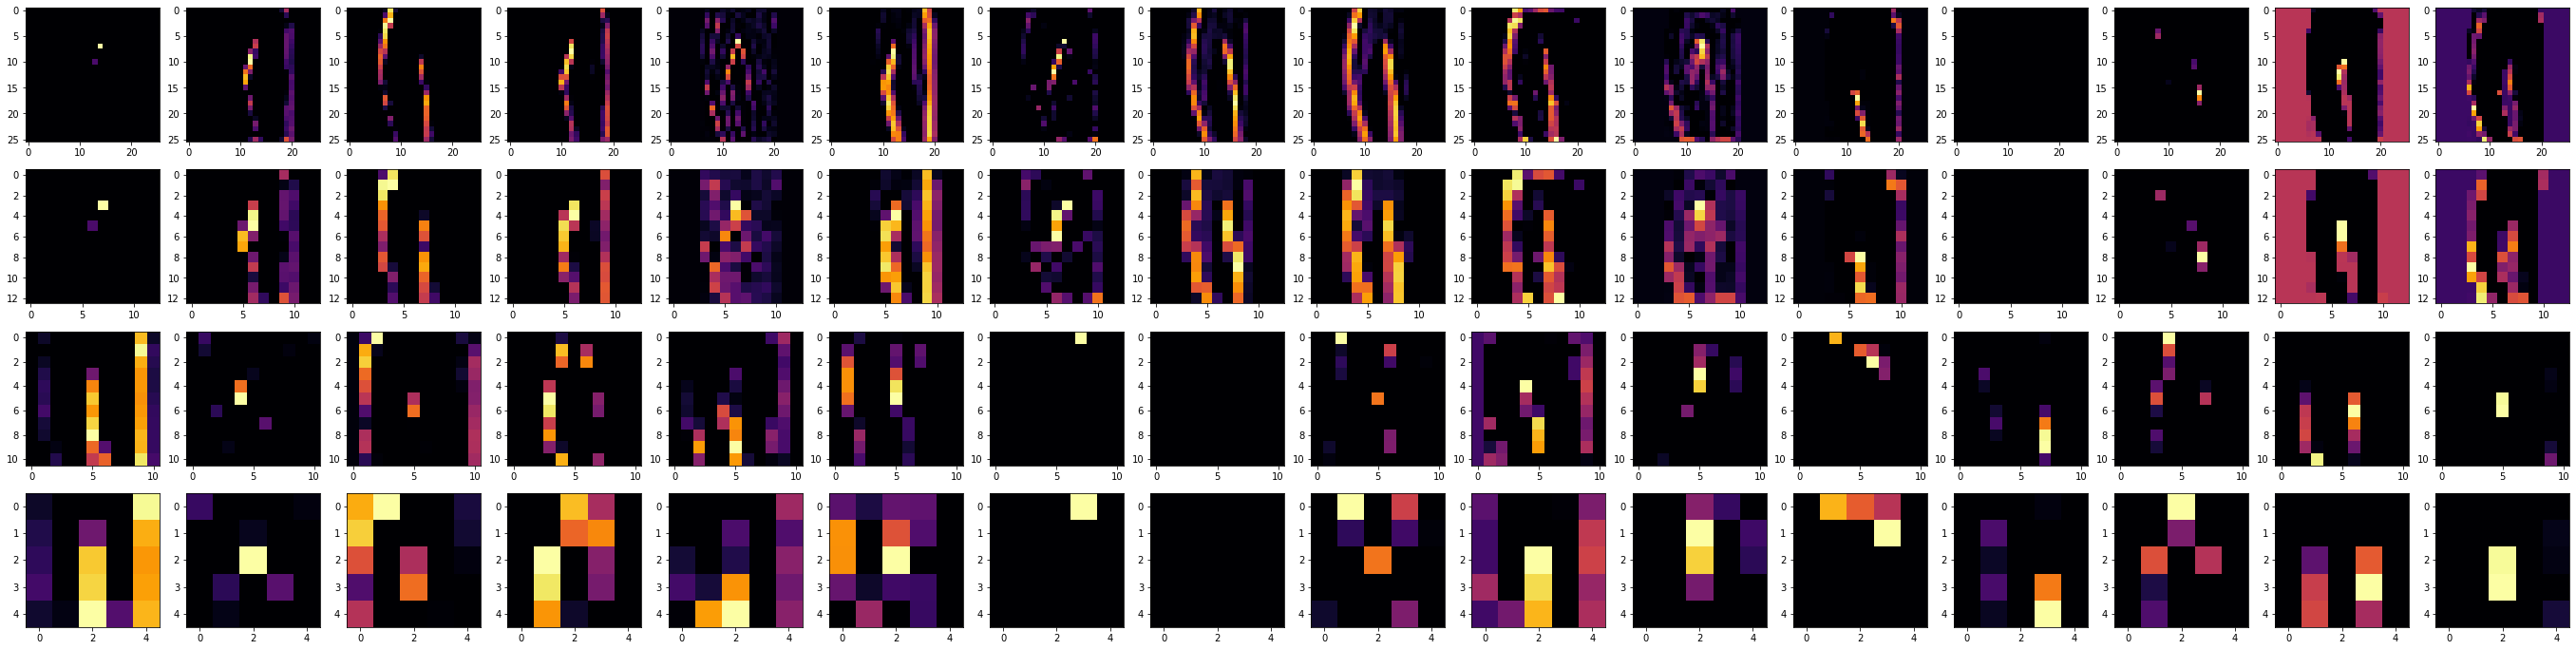

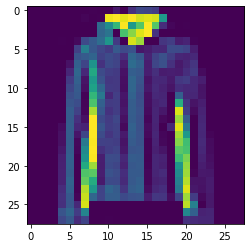

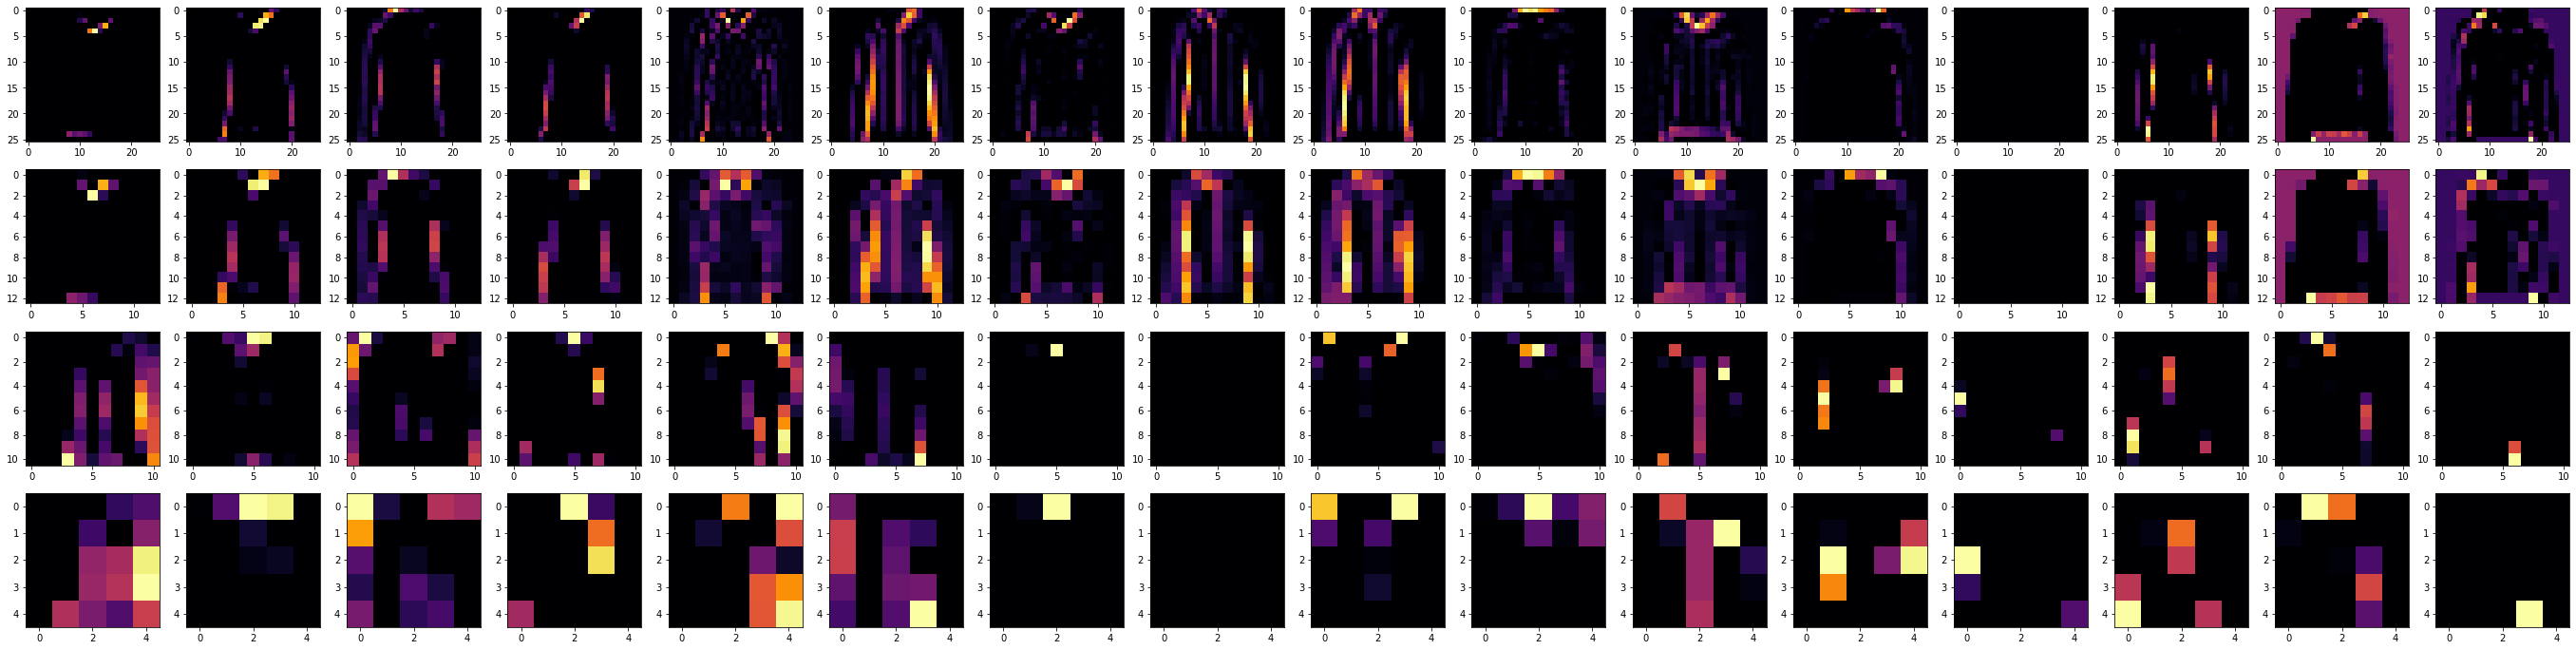

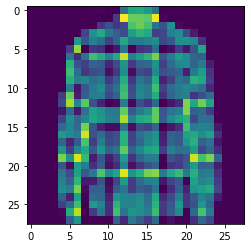

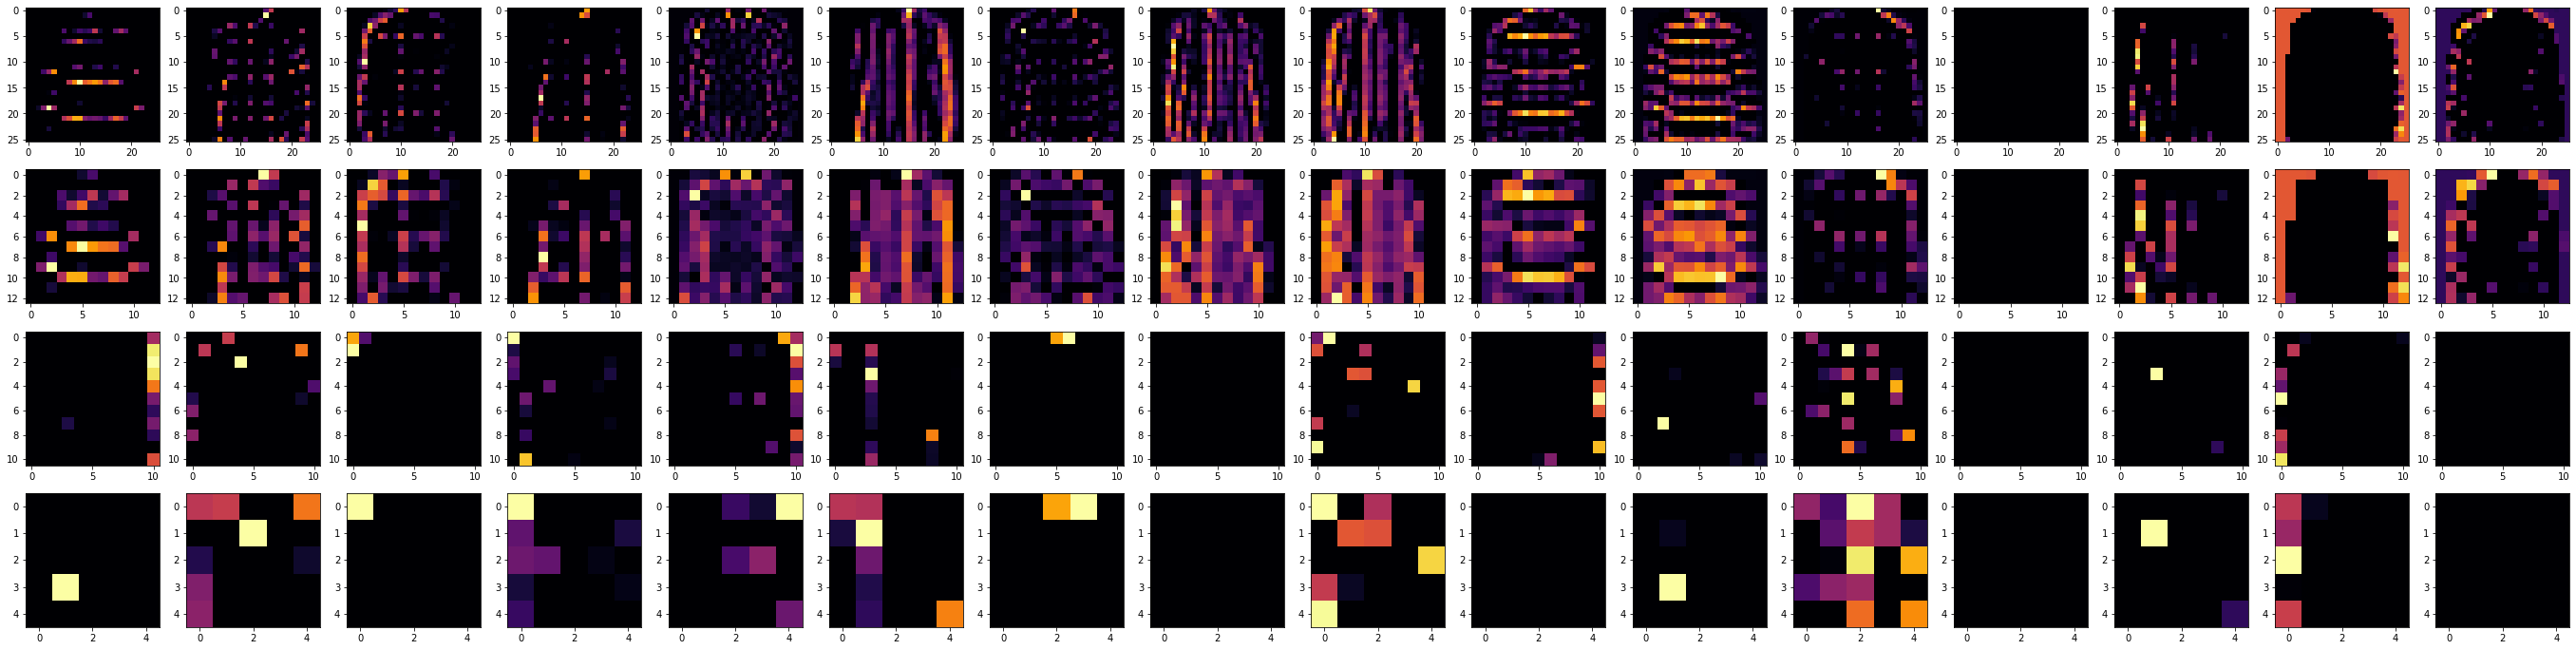

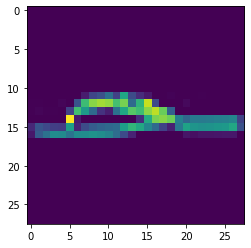

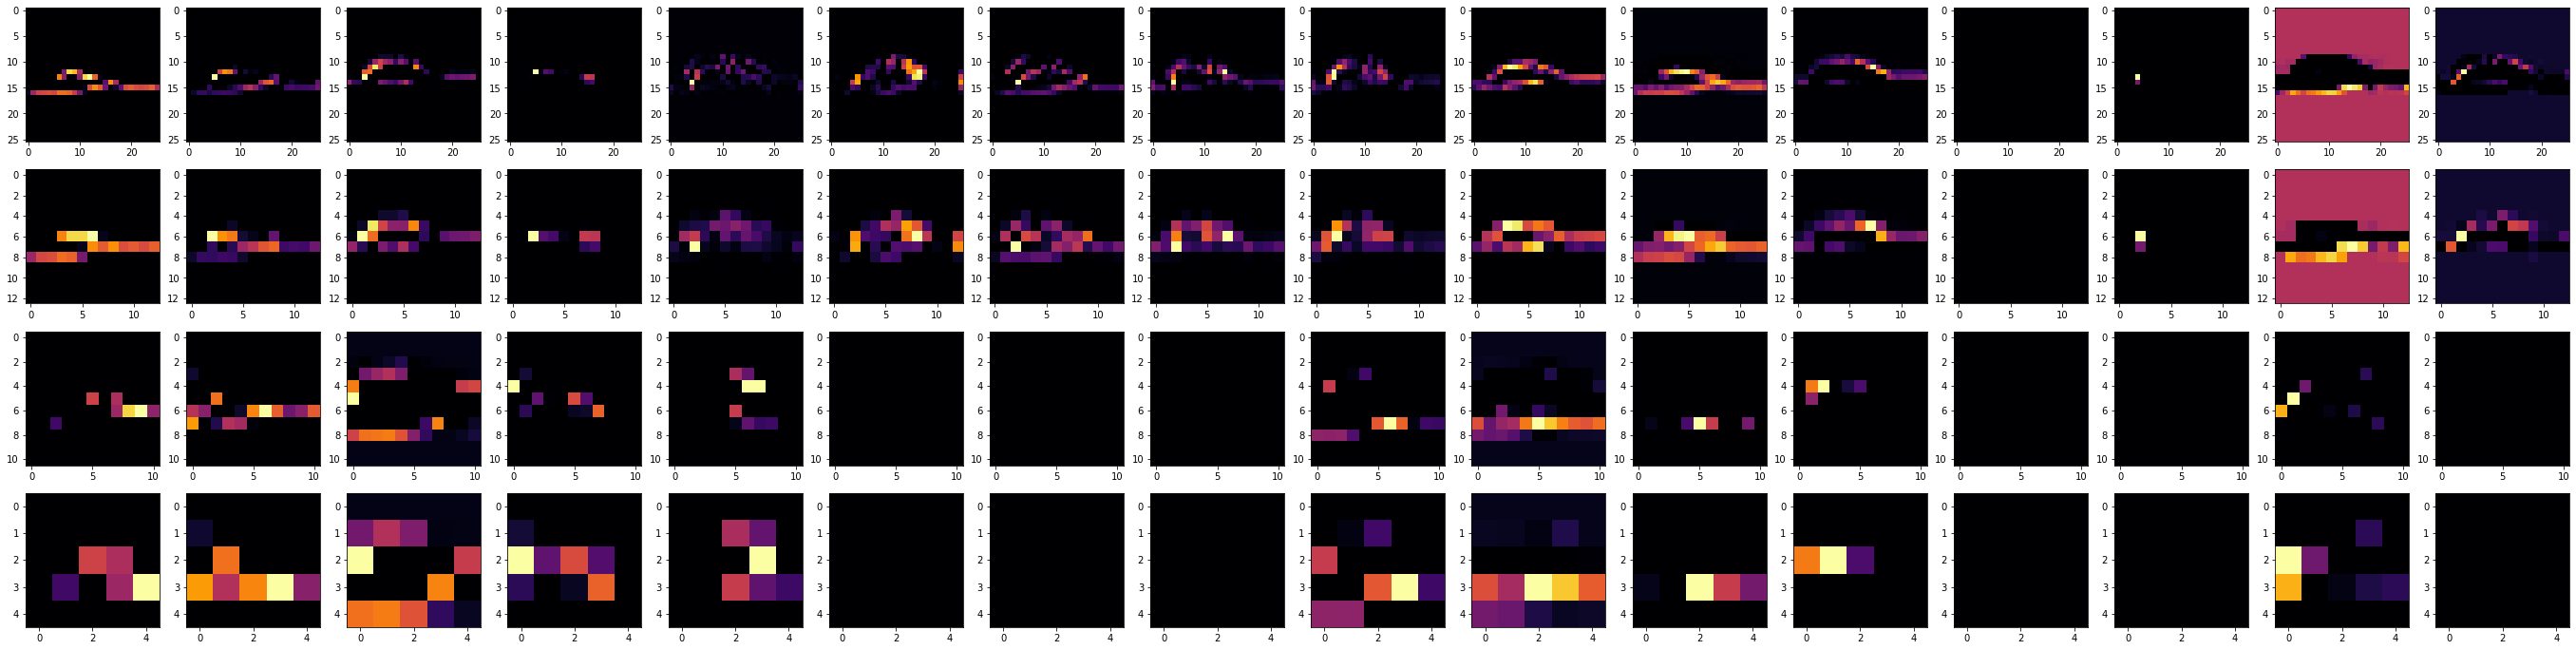

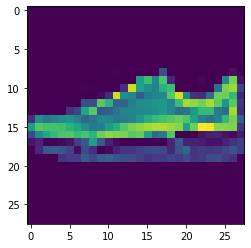

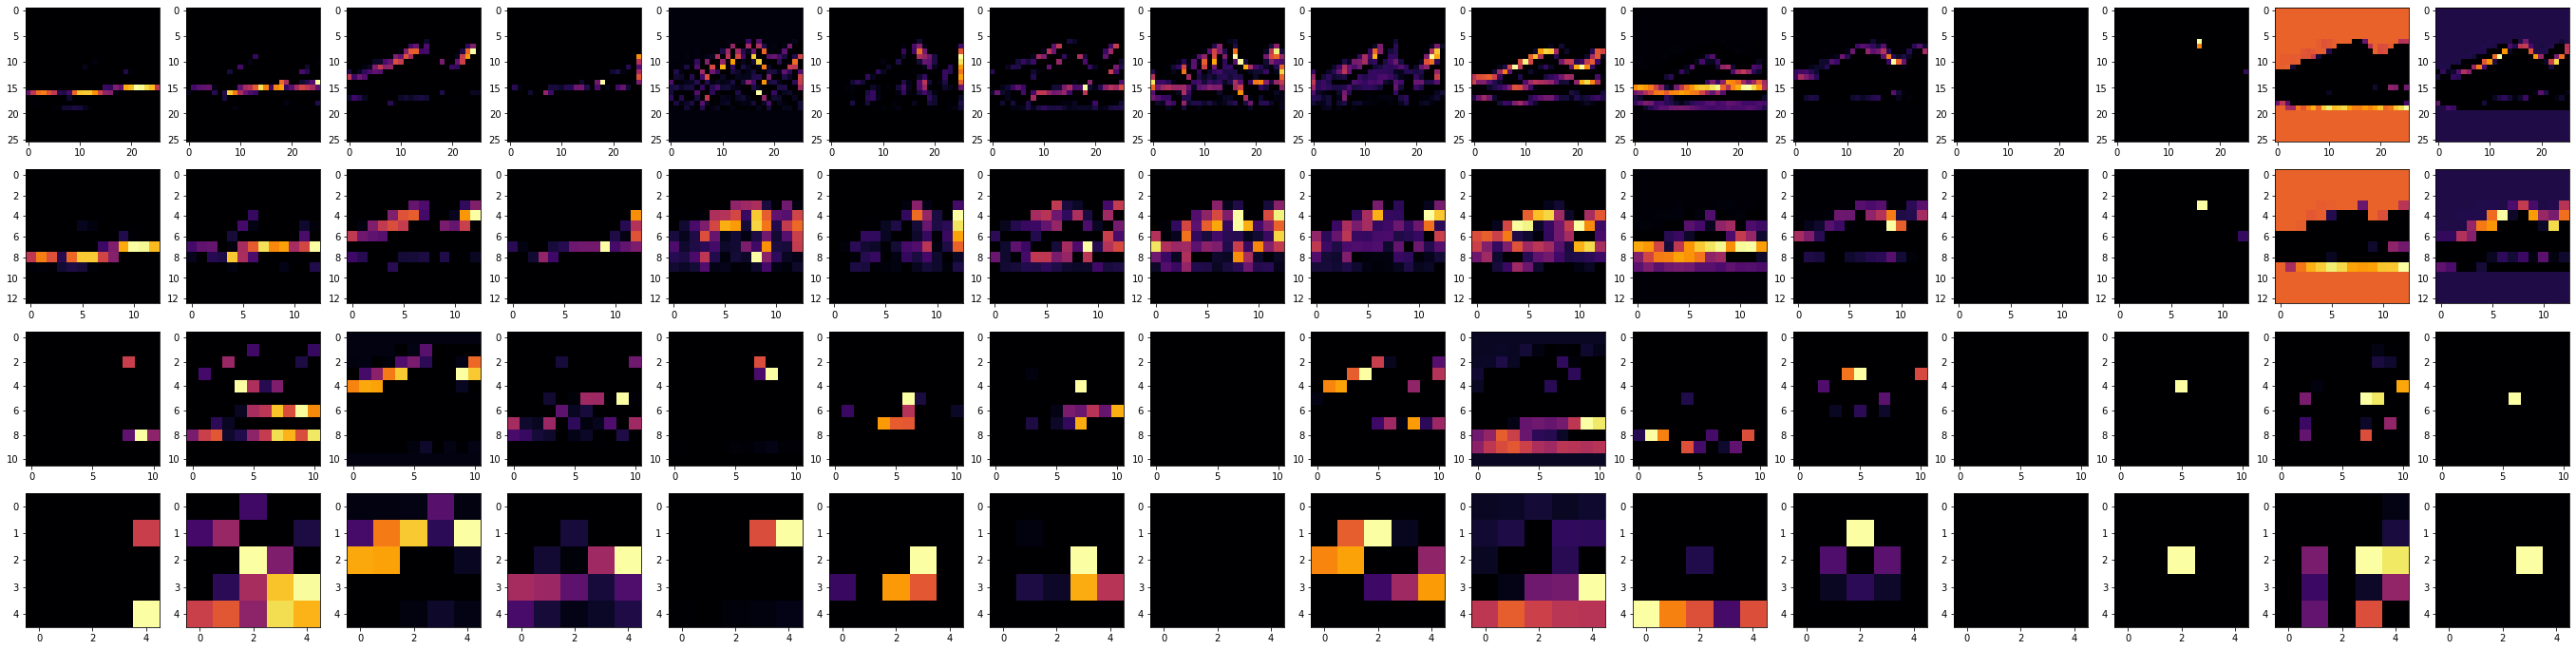

In [ ]:
for image in range(10):

    plt.imshow(test_img[image].reshape(28,28))
    plt.show()

    fig, ax = plt.subplots(nrows=4, ncols = 16, figsize = (12*4,12))
    for layer in range(4):
        for CONVOLUTION_NUMBER in range(16):
            f1 = activation_model.predict(test_img[image].reshape(1,28,28,1))[layer]
            #print(f1.shape)
            ax[layer, CONVOLUTION_NUMBER].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
            ax[layer, CONVOLUTION_NUMBER].grid(False)
    plt.show()


(5, 5)